In [2]:
import sqlite3

import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval
from operator import itemgetter
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [ ]:
conn = sqlite3.connect('../../Data/Experiment_2/exp2_remote.db')
dat = pd.read_sql('SELECT * FROM trials A INNER JOIN subjects B ON A.subject_id = B.id WHERE B.completion=1', con=conn)

In [ ]:
anim = dat.loc[(dat.anim_check == 1)&
              (dat.tower_check == 1 )& (dat.agent_check==1)]
inanim = dat.loc[(dat.anim_check == 1)&
              (dat.tower_check == 1 )]

In [ ]:
dat = dat.loc[(dat.anim_check == 1)&
              (dat.tower_check == 1 )]
dat = pd.DataFrame(dat.values[:,~dat.columns.duplicated()], columns=dat.columns[~dat.columns.duplicated()])

len(dat.prolificID.unique())

In [4]:
dat['cause_agent'] = dat['cause_agent'].apply(literal_eval)
dat['cause_patient'] = dat['cause_patient'].apply(literal_eval)
dat['num_moves_cause_agent'] = [len(x) for x in dat.cause_agent]
dat['agent'] = dat.cause_agent.map(lambda x: x[-1])
dat['num_moves_cause_patient'] = [len(x) for x in dat.cause_patient]
dat['patient'] = dat.cause_patient.map(lambda x:x[-1])
dat['exp_cond'] = dat.exp_cond.map(lambda x: x.split('_'))
dat[['animacy', 'norm_violation']] = dat['exp_cond'].transform({'item1': itemgetter(0), 'item2': itemgetter(1)})

xx = dat.groupby('prolificID').count().id > 1
extrasubs = xx.loc[xx.values == True].index.tolist()

In [5]:
for subj in extrasubs:
    dat.drop(dat.loc[dat.prolificID == subj].index[-1], inplace=True)
dat.reset_index(drop=True, inplace=True)

In [ ]:
f, a = plt.subplots(figsize=(8, 5))
sns.boxplot(x='exp_cond', y='final_cause_agent', data=dat)

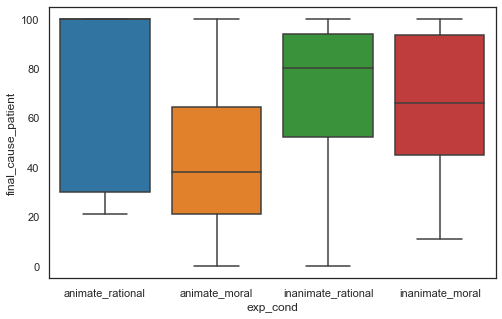

In [6]:
f, a = plt.subplots(figsize=(8, 5))
sns.boxplot(x='exp_cond', y='final_cause_patient', data=dat)

In [68]:
dat_long = dat.melt(id_vars=['prolificID', 'animacy', 'norm_violation'], value_vars=['agent', 'patient'],
                    var_name='candidate', value_name='causal rating')


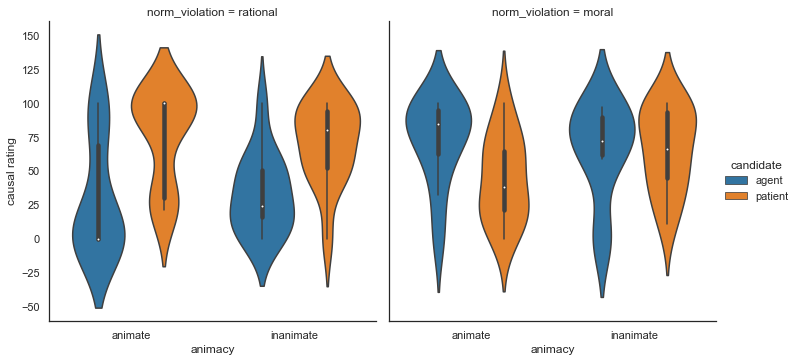

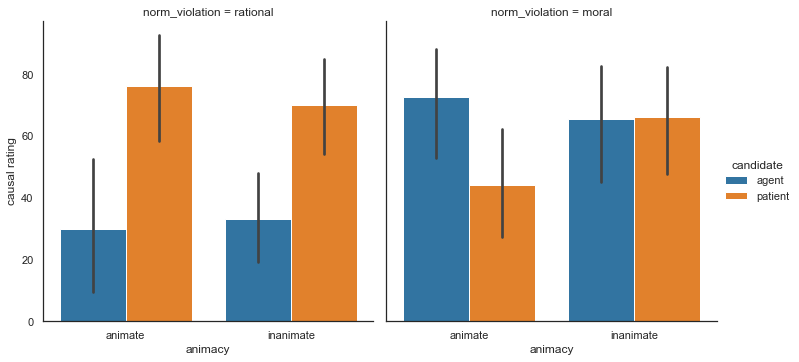

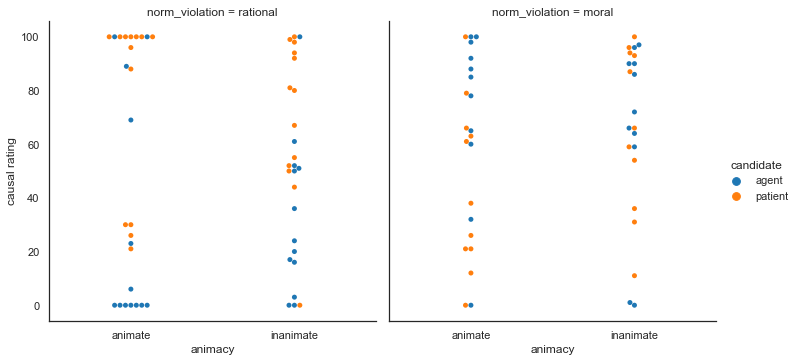

In [15]:
#f, a = plt.subplots(figsize=(8,6))
sns.catplot(x='animacy', y='causal rating', hue='candidate', col='norm_violation', data=dat_long, kind='violin')

sns.catplot(x='animacy', y='causal rating', hue='candidate', col='norm_violation', data=dat_long, kind='bar')
sns.catplot(x='animacy', y='causal rating', hue='candidate', col='norm_violation', data=dat_long, kind='swarm' )

Text(0.5, 1.0, 'Animate')

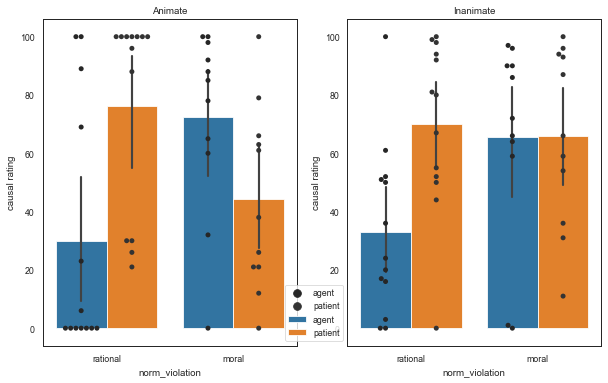

In [26]:
sns.set_context(context='paper')
f, ax = plt.subplots(figsize=(10,6),nrows=1, ncols=2, sharey='col')
gg = sns.barplot(data=dat_long.loc[dat_long.animacy == 'animate'], x='norm_violation', y='causal rating', hue='candidate', ax=ax[0])
gg = sns.swarmplot(data=dat_long.loc[dat_long.animacy == 'animate'], x='norm_violation', y='causal rating', hue='candidate', dodge=True,  color=".2", ax=ax[0], label=None)
g = sns.barplot(data=dat_long.loc[dat_long.animacy == 'inanimate'], x='norm_violation', y='causal rating',hue='candidate', ax=ax[1])
g = sns.swarmplot(data=dat_long.loc[dat_long.animacy == 'inanimate'], x='norm_violation', y='causal rating',hue='candidate',dodge=True, color=".2", ax=ax[1], label='_nolegend_')
gg.get_legend().remove()
g.legend(bbox_to_anchor=(0., 0.2, 0., 0.))
g.set_title('Inanimate')
gg.set_title('Animate')
#plt.savefig('exp2_pilota.png')

In [70]:
#subj = extrasubs[1]

Text(0.5, 1.0, 'Animate')

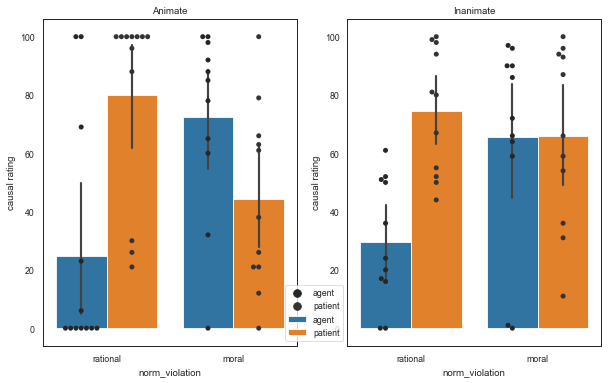

In [6]:
dat_long = dat.melt(id_vars=['prolificID', 'animacy', 'norm_violation'], value_vars=['agent', 'patient'],
                    var_name='candidate', value_name='causal rating')


sns.set_context(context='paper')
f, ax = plt.subplots(figsize=(10,6),nrows=1, ncols=2, sharey='col')
gg = sns.barplot(data=dat_long.loc[dat_long.animacy == 'animate'], x='norm_violation', y='causal rating', hue='candidate', ax=ax[0])
gg = sns.swarmplot(data=dat_long.loc[dat_long.animacy == 'animate'], x='norm_violation', y='causal rating', hue='candidate', dodge=True,  color=".2", ax=ax[0], label=None)
g = sns.barplot(data=dat_long.loc[dat_long.animacy == 'inanimate'], x='norm_violation', y='causal rating',hue='candidate', ax=ax[1])
g = sns.swarmplot(data=dat_long.loc[dat_long.animacy == 'inanimate'], x='norm_violation', y='causal rating',hue='candidate',dodge=True, color=".2", ax=ax[1], label='_nolegend_')
gg.get_legend().remove()
g.legend(bbox_to_anchor=(0., 0.2, 0., 0.))
g.set_title('Inanimate')
gg.set_title('Animate')

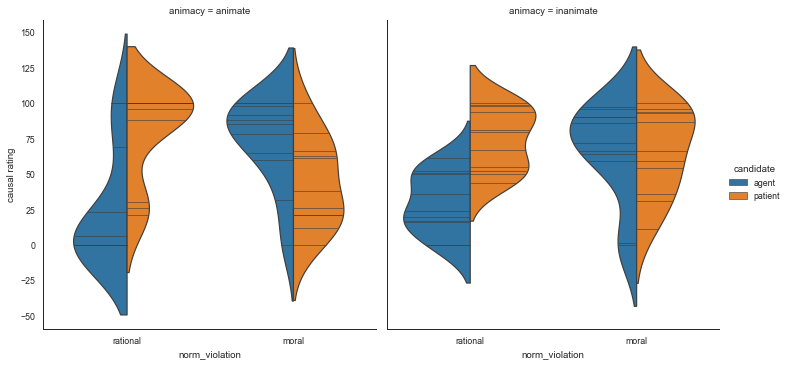

In [6]:
sns.catplot(col='animacy', x='norm_violation', y='causal rating', hue='candidate',
            kind='violin', inner="stick", split=True, data=dat_long )

In [7]:
len(dat.prolificID.unique())

44